Import of libreries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

Import the raw data of Proyect Long-term energy environment data for ORNL Research House

In [2]:
DataFolderPath = "/Users/Marrugo/Dropbox/git_for_clone/Ac consumption prediction of ORNL Research House--MARRUGO--THOUVENIN/data_Oak_Ride_National_Laboratory.csv"
DF_Data_RAW = pd.read_csv(DataFolderPath,sep = ",",index_col=0) 

/Users/Marrugo/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (68,71,83,84,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Convert the index of the Data in datatime type 

In [3]:
previousIndex= DF_Data_RAW.index
NewparsedIndex = pd.to_datetime(previousIndex)
DF_Data_RAW.index= NewparsedIndex

Selecting the output data that is the total Ac consumption of the house

In [4]:
DF_TotalEnergy=DF_Data_RAW[["main_Tot"]]

Selecting the input data from the Raw data (Temperature,relativity humidity, wind speed, solar radiation and precipitation)

In [5]:
DF_Input1=DF_Data_RAW.loc[:,"Outside_Tmp_Avg":"wind_speed_mean"]
DF_solar_radiation=DF_Data_RAW[["SlrW1_Avg"]]
DF_Precipitation=DF_Data_RAW[["Rain_in_Tot"]]

Combining the output data and the input data 

In [7]:
DF_Data_selected=DF_TotalEnergy.join([DF_Input1,DF_solar_radiation,DF_Precipitation])

Cleaning the non value data

In [8]:
DF_Data_selected_clean = DF_Data_selected.dropna()

Converting the data to float64 to do the correlation 

In [9]:
DF_Data_selected_float64=DF_Data_selected_clean.astype("float64")

Definition of the function for creating lagged columns for each 15 minutes

In [11]:
def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i*15)+"min"
        df[new_column_name]=df[column_name].shift(i)
    return df

Creating lagging for each variable (Temperature,relativity humidity, wind speed, solar radiation and precipitation)

In [12]:
DF_Data_selected_float64=lag_column(DF_Data_selected_float64,"Outside_Tmp_Avg",36)
DF_Data_selected_float64=lag_column(DF_Data_selected_float64,"Outside_RH_Avg",36)
DF_Data_selected_float64=lag_column(DF_Data_selected_float64,"wind_speed_mean",36)
DF_Data_selected_float64=lag_column(DF_Data_selected_float64,"SlrW1_Avg",36)
DF_Data_selected_float64=lag_column(DF_Data_selected_float64,"Rain_in_Tot",36)

Organize the data according maximun lagged made

In [13]:
DF_Data_selected_float64.dropna(inplace=True)


Correlating the data

In [15]:
correlation=DF_Data_selected_float64.corr()


Showing the correlation

In [16]:
correlation

,main_Tot,Outside_Tmp_Avg,Outside_RH_Avg,wind_speed_mean,SlrW1_Avg,Rain_in_Tot,Outside_Tmp_Avg-15min,Outside_Tmp_Avg-30min,Outside_Tmp_Avg-45min,Outside_Tmp_Avg-60min,...,Rain_in_Tot-405min,Rain_in_Tot-420min,Rain_in_Tot-435min,Rain_in_Tot-450min,Rain_in_Tot-465min,Rain_in_Tot-480min,Rain_in_Tot-495min,Rain_in_Tot-510min,Rain_in_Tot-525min,Rain_in_Tot-540min
main_Tot,1.000000,-3.757903e-01,-0.051510,0.006125,-0.112623,-0.031069,-0.376009,-0.375884,-0.375463,-0.374039,...,-2.028968e-02,-0.021200,-0.020292,-0.015182,-0.014666,-0.012228,-0.014454,-0.011245,-0.009812,-0.012226
Outside_Tmp_Avg,-0.375790,1.000000e+00,-0.077069,0.064936,0.383242,0.005668,0.997374,0.992048,0.986028,0.979842,...,-9.883651e-07,-0.000235,-0.000404,-0.000439,-0.000610,-0.000753,-0.000957,-0.001198,-0.001448,-0.001528
Outside_RH_Avg,-0.051510,-7.706862e-02,1.000000,-0.594092,-0.527331,0.087827,-0.077613,-0.076372,-0.073341,-0.067154,...,7.378338e-02,0.072738,0.071791,0.070775,0.070009,0.069145,0.067733,0.066414,0.065093,0.063502
wind_speed_mean,0.006125,6.493614e-02,-0.594092,1.000000,0.565655,0.028348,0.061545,0.054863,0.046710,0.037103,...,-9.268612e-03,-0.008807,-0.008288,-0.009647,-0.010139,-0.011885,-0.009395,-0.009215,-0.007575,-0.006103
SlrW1_Avg,-0.112623,3.832418e-01,-0.527331,0.565655,1.000000,-0.051517,0.366989,0.351010,0.334465,0.316416,...,-2.682580e-02,-0.025780,-0.024223,-0.022780,-0.021306,-0.019319,-0.018569,-0.018807,-0.017429,-0.016669
Rain_in_Tot,-0.031069,5.667545e-03,0.087827,0.028348,-0.051517,1.000000,0.011962,0.015946,0.018191,0.019089,...,3.536831e-02,0.031966,0.025346,0.027777,0.025277,0.020185,0.016644,0.015834,0.017153,0.014260
Outside_Tmp_Avg-15min,-0.376009,9.973737e-01,-0.077613,0.061545,0.366989,0.011962,1.000000,0.997358,0.992001,0.986451,...,3.915639e-04,0.000047,-0.000187,-0.000357,-0.000392,-0.000564,-0.000707,-0.000912,-0.001153,-0.001404
Outside_Tmp_Avg-30min,-0.375884,9.920484e-01,-0.076372,0.054863,0.351010,0.015946,0.997358,1.000000,0.997341,0.992522,...,7.127289e-04,0.000443,0.000098,-0.000138,-0.000308,-0.000344,-0.000516,-0.000660,-0.000865,-0.001108
Outside_Tmp_Avg-45min,-0.375463,9.860284e-01,-0.073341,0.046710,0.334465,0.018191,0.992001,0.997341,1.000000,0.997961,...,1.129967e-03,0.000767,0.000496,0.000149,-0.000087,-0.000258,-0.000294,-0.000466,-0.000611,-0.000817
Outside_Tmp_Avg-60min,-0.374039,9.798418e-01,-0.067154,0.037103,0.316416,0.019089,0.986451,0.992522,0.997961,1.000000,...,1.474861e-03,0.001161,0.000798,0.000527,0.000180,-0.000057,-0.000228,-0.000264,-0.000437,-0.000582


Saving the correlation in a .CSV file

In [17]:
DataFolderPath1 = "/Users/Marrugo/Dropbox/git_for_clone/Ac consumption prediction of ORNL Research House--MARRUGO--THOUVENIN/data_correlation.csv"
correlation.to_csv(DataFolderPath1,sep = ",")

Defining the function for creating features for the data (hour of day, weekday, weekend, day/night, sin hour, cos hour) 

In [18]:
def features_creation(df):
    df['sin_hour'] = np.sin((df.index.hour)*2*np.pi/24)
    df['cos_hour'] = np.cos((df.index.hour)*2*np.pi/24)
    df['hour'] = df.index.hour # 0 to 23
    df['day_of_week'] = df.index.dayofweek #Monday = 0, sunday = 6
    df['weekend'] = [ 1 if day in (5, 6) else 0 for day in df.index.dayofweek ] # 1 for weekend and 0 for weekdays
    df['month'] = df.index.month
    df['week_of_year'] = df.index.week
    # day = 1 if(10Hrs -19Hrs) and Night = 0 (otherwise)
    df['day_night'] = [1 if day<20 and day>9 else 0 for day in df.index.hour ]
    return df

Adding the time base features to data 

In [19]:
Data_final=features_creation(DF_Data_selected_float64)

Replacing the name of the columns

In [21]:
Data_final.rename(columns = {'main_Tot':"AC_consump"},inplace=True)
Data_final.rename(columns = {'Outside_Tmp_Avg':"Temperature_Avg"},inplace=True)
Data_final.rename(columns = {'Outside_RH_Avg':"Relative_Humidity"},inplace=True)
Data_final.rename(columns = {'SlrW1_Avg':"Solar_radiation"},inplace=True)
Data_final.rename(columns = {'Rain_in_Tot':"Precipitation"},inplace=True)

Showing the first 5 rows of the final data 

In [22]:
Data_final.head()


,AC_consump,Temperature_Avg,Relative_Humidity,wind_speed_mean,Solar_radiation,Precipitation,Outside_Tmp_Avg-15min,Outside_Tmp_Avg-30min,Outside_Tmp_Avg-45min,Outside_Tmp_Avg-60min,...,Rain_in_Tot-525min,Rain_in_Tot-540min,sin_hour,cos_hour,hour,day_of_week,weekend,month,week_of_year,day_night
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-10-01 09:15:00,840.0,59.66,94.8,0.0,57.57,0.0,58.89,58.10,57.52,56.86,...,0.0,0.0,0.707107,-0.707107,9,1,0,10,40,0
2013-10-01 09:30:00,347.5,60.44,94.4,0.0,75.62,0.0,59.66,58.89,58.10,57.52,...,0.0,0.0,0.707107,-0.707107,9,1,0,10,40,0
2013-10-01 09:45:00,305.0,61.48,94.1,0.0,92.90,0.0,60.44,59.66,58.89,58.10,...,0.0,0.0,0.707107,-0.707107,9,1,0,10,40,0
2013-10-01 10:00:00,292.5,62.69,93.3,0.0,105.40,0.0,61.48,60.44,59.66,58.89,...,0.0,0.0,0.500000,-0.866025,10,1,0,10,40,1
2013-10-01 10:15:00,627.5,63.56,91.4,0.0,119.40,0.0,62.69,61.48,60.44,59.66,...,0.0,0.0,0.500000,-0.866025,10,1,0,10,40,1


Adding the best correlated lagged data with respect to the AC consumption to the final data

In [23]:
#solar radiation lagged data
Data_final["Solar_radiation-6.25 hrs"]=Data_final["Solar_radiation"].shift(25)
Data_final["Solar_radiation-6.5 hrs"]=Data_final["Solar_radiation"].shift(26)
Data_final["Solar_radiation-6.75 hrs"]=Data_final["Solar_radiation"].shift(27)
#temperature lagged data
Data_final["Temperature_Avg-5.25 hrs"]=Data_final["Temperature_Avg"].shift(21)
Data_final["Temperature_Avg-5.5 hrs"]=Data_final["Temperature_Avg"].shift(22)
Data_final["Temperature_Avg-5.75 hrs"]=Data_final["Temperature_Avg"].shift(23)
#relative humidity lagged data
Data_final["Relative_Humidity-5.0 hrs"]=Data_final["Relative_Humidity"].shift(20)
Data_final["Relative_Humidity-5.25 hrs"]=Data_final["Relative_Humidity"].shift(21)
Data_final["Relative_Humidity-5.5 hrs"]=Data_final["Relative_Humidity"].shift(22)
#precipitation lagged data 
Data_final["Precipitation-0.45 hrs"]=Data_final["Precipitation"].shift(3)
Data_final["Precipitation-3 hrs"]=Data_final["Precipitation"].shift(12)

Organize the final data according with the lagged made

In [24]:
Data_final.dropna(inplace=True)

Showing the first 5 rows of the final data with the lagged data

In [25]:
Data_final.head()

,AC_consump,Temperature_Avg,Relative_Humidity,wind_speed_mean,Solar_radiation,Precipitation,Outside_Tmp_Avg-15min,Outside_Tmp_Avg-30min,Outside_Tmp_Avg-45min,Outside_Tmp_Avg-60min,...,Solar_radiation-6.5 hrs,Solar_radiation-6.75 hrs,Temperature_Avg-5.25 hrs,Temperature_Avg-5.5 hrs,Temperature_Avg-5.75 hrs,Relative_Humidity-5.0 hrs,Relative_Humidity-5.25 hrs,Relative_Humidity-5.5 hrs,Precipitation-0.45 hrs,Precipitation-3 hrs
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-10-01 16:00:00,157.5,78.94,54.33,0.983,561.40,0.0,77.88,78.18,77.79,78.34,...,75.62,57.57,65.25,64.44,63.56,82.00,85.30,88.90,0.0,0.0
2013-10-01 16:15:00,647.5,79.07,51.62,1.166,522.30,0.0,78.94,77.88,78.18,77.79,...,92.90,75.62,66.24,65.25,64.44,78.72,82.00,85.30,0.0,0.0
2013-10-01 16:30:00,540.0,78.43,51.65,1.374,392.40,0.0,79.07,78.94,77.88,78.18,...,105.40,92.90,67.17,66.24,65.25,76.42,78.72,82.00,0.0,0.0
2013-10-01 16:45:00,550.0,77.66,52.06,1.056,68.95,0.0,78.43,79.07,78.94,77.88,...,119.40,105.40,67.92,67.17,66.24,69.70,76.42,78.72,0.0,0.0
2013-10-01 17:00:00,502.5,77.08,53.99,0.340,62.43,0.0,77.66,78.43,79.07,78.94,...,139.00,119.40,71.19,67.92,67.17,67.50,69.70,76.42,0.0,0.0


Defining the target of the linear regression

In [27]:
DF_target = Data_final["AC_consump"]

Defining the features of the linear regression

In [28]:
DF_features = Data_final.drop("AC_consump",axis=1)

Importing the train test split librery

In [29]:
from sklearn.model_selection import train_test_split

Selecting the data from train and test the linear regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size=0.2, random_state=41234)

Importing the linear model librery

In [33]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

Making the linear regression with the data for training

In [34]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predicting data with the test data

In [35]:
predict = linear_reg.predict(X_test)

Creating a series data with the predicte data using the linear regression 

In [36]:
predictions = pd.Series(predict.ravel(),index=y_test.index).rename("AC_consump"+"_predicted")

Creating a data frame with the predicted data and the test data

In [37]:
predictions_frame = pd.DataFrame(predictions).join(y_test)

Ploting the prediction and the test data for the range of date (2014-08-25:2014-09-05)

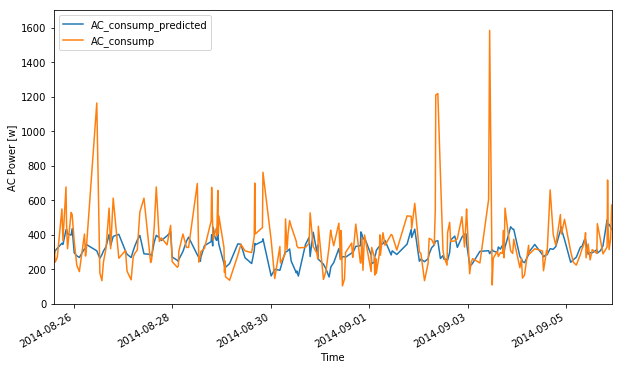

In [49]:
predictions_frame['2014-08-25 13:45:00':'2014-09-05 23:15:00'].plot()
plt.xlabel('Time')
plt.ylabel('AC Power [w]')
plt.ylim([0,1700])
plt.show()

Importing the libraries for the square error, mean error and mean square error

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


Calculating the squared error, mean absolute error and mean squared absuluted error

In [45]:
R2_score = r2_score(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])
Mean_absolute=mean_absolute_error(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])
Mean_absolute_square=mean_squared_error(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])


Showing the results of the errors 

In [47]:
print " The square error of the predicted data is "+str(R2_score)+"\n"
print " The mean absolute error of the predicted data is "+str(Mean_absolute)+"\n"
print " The mean absolute square error of the predicted data is "+str(Mean_absolute_square)+"\n"

 The square error of the predicted data is 0.270728383509

 The mean absolute error of the predicted data is 147.087010804

 The mean absolute square error of the predicted data is 43949.730441



In [ ]:
print len(predictions)